# KKBox user_logs_v2.csv 집계 데이터 탐색
> 작성자: 이도훈 (LDH)

- `user_logs_aggregated.parquet`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 1. user_logs_aggregated 데이터 요약


In [2]:
# User Logs 집계 데이터 로드
user_logs_agg = pd.read_parquet('../data/processed/user_logs_aggregated.parquet')
print(f"Shape: {user_logs_agg.shape}")
print(f"Columns: {user_logs_agg.columns.tolist()}")


Shape: (1103894, 67)
Columns: ['msno', 'num_days_active_w7', 'total_secs_w7', 'avg_secs_per_day_w7', 'std_secs_w7', 'num_songs_w7', 'avg_songs_per_day_w7', 'num_unq_w7', 'num_25_w7', 'num_100_w7', 'short_play_w7', 'skip_ratio_w7', 'completion_ratio_w7', 'short_play_ratio_w7', 'variety_ratio_w7', 'num_days_active_w14', 'total_secs_w14', 'avg_secs_per_day_w14', 'std_secs_w14', 'num_songs_w14', 'avg_songs_per_day_w14', 'num_unq_w14', 'num_25_w14', 'num_100_w14', 'short_play_w14', 'skip_ratio_w14', 'completion_ratio_w14', 'short_play_ratio_w14', 'variety_ratio_w14', 'num_days_active_w21', 'total_secs_w21', 'avg_secs_per_day_w21', 'std_secs_w21', 'num_songs_w21', 'avg_songs_per_day_w21', 'num_unq_w21', 'num_25_w21', 'num_100_w21', 'short_play_w21', 'skip_ratio_w21', 'completion_ratio_w21', 'short_play_ratio_w21', 'variety_ratio_w21', 'num_days_active_w30', 'total_secs_w30', 'avg_secs_per_day_w30', 'std_secs_w30', 'num_songs_w30', 'avg_songs_per_day_w30', 'num_unq_w30', 'num_25_w30', 'num_10

In [ ]:
# head() 출력
user_logs_agg.head(30)

,msno,num_days_active_w7,total_secs_w7,avg_secs_per_day_w7,std_secs_w7,num_songs_w7,avg_songs_per_day_w7,num_unq_w7,num_25_w7,num_100_w7,short_play_w7,skip_ratio_w7,completion_ratio_w7,short_play_ratio_w7,variety_ratio_w7,num_days_active_w14,total_secs_w14,avg_secs_per_day_w14,std_secs_w14,num_songs_w14,avg_songs_per_day_w14,num_unq_w14,num_25_w14,num_100_w14,short_play_w14,skip_ratio_w14,completion_ratio_w14,short_play_ratio_w14,variety_ratio_w14,num_days_active_w21,total_secs_w21,avg_secs_per_day_w21,std_secs_w21,num_songs_w21,avg_songs_per_day_w21,num_unq_w21,num_25_w21,num_100_w21,short_play_w21,skip_ratio_w21,completion_ratio_w21,short_play_ratio_w21,variety_ratio_w21,num_days_active_w30,total_secs_w30,avg_secs_per_day_w30,std_secs_w30,num_songs_w30,avg_songs_per_day_w30,num_unq_w30,num_25_w30,num_100_w30,short_play_w30,skip_ratio_w30,completion_ratio_w30,short_play_ratio_w30,variety_ratio_w30,secs_trend_w7_w30,secs_trend_w14_w30,days_trend_w7_w14,days_trend_w7_w30,songs_trend_w7_w30,songs_trend_w14_w30,skip_trend_w7_w30,completion_trend_w7_w30,recency_secs_ratio,recency_songs_ratio
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,6.0,18101.197,3016.866167,1925.044662,98.0,16.333333,86.0,20.0,70.0,22.0,0.204082,0.714286,0.224490,0.877551,12.0,47893.766,3991.147167,4068.514095,247.0,20.583333,224.0,47.0,186.0,52.0,0.190283,0.753036,0.210526,0.906883,19.0,75354.606,3966.031895,3738.671749,384.0,20.210526,339.0,72.0,293.0,80.0,0.187500,0.763021,0.208333,0.882812,26,117907.425,4534.900962,6478.011311,584,22.461538,530,86,472,97,0.147260,0.808219,0.166096,0.907534,0.153520,0.406198,0.500000,0.230769,0.167808,0.422945,0.056821,-0.093933,0.153520,0.167808
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,7.0,48358.165,6908.309286,4181.532903,287.0,41.000000,207.0,55.0,154.0,82.0,0.191638,0.536585,0.285714,0.721254,14.0,92792.387,6628.027643,3414.042189,532.0,38.000000,402.0,96.0,283.0,139.0,0.180451,0.531955,0.261278,0.755639,21.0,132738.241,6320.868619,3293.524096,758.0,36.095238,595.0,133.0,395.0,201.0,0.175462,0.521108,0.265172,0.784960,31,192527.892,6210.577161,3380.981192,1089,35.129032,885,191,589,281,0.175390,0.540863,0.258035,0.812672,0.251175,0.481969,0.500000,0.225806,0.263545,0.488522,0.016247,-0.004278,0.251175,0.263545
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,7.0,21110.677,3015.811000,2987.514417,94.0,13.428571,90.0,3.0,84.0,6.0,0.031915,0.893617,0.063830,0.957447,13.0,31660.405,2435.415769,2385.819001,158.0,12.153846,152.0,19.0,126.0,23.0,0.120253,0.797468,0.145570,0.962025,19.0,63267.140,3329.849474,2827.008850,308.0,16.210526,283.0,27.0,261.0,33.0,0.087662,0.847403,0.107143,0.918831,28,115411.260,4121.830714,3485.828823,567,20.250000,468,43,485,55,0.075838,0.855379,0.097002,0.825397,0.182917,0.274327,0.538462,0.250000,0.165785,0.278660,-0.043923,0.038238,0.182917,0.165785
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,3.0,8590.802,2863.600667,1802.329890,58.0,19.333333,39.0,17.0,28.0,22.0,0.293103,0.482759,0.379310,0.672414,8.0,43512.906,5439.113250,6041.215284,250.0,31.250000,211.0,53.0,151.0,77.0,0.212000,0.604000,0.308000,0.844000,15.0,97550.828,6503.388533,6589.000788,574.0,38.266667,504.0,110.0,311.0,179.0,0.191638,0.541812,0.311847,0.878049,21,149896.558,7137.931333,5899.022455,942,44.857143,828,207,436,355,0.219745,0.462845,0.376858,0.878981,0.057312,0.290286,0.375000,0.142857,0.061571,0.265393,0.073358,0.019914,0.057312,0.061571
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,6.0,33956.872,5659.478667,3897.840100,198.0,33.000000,99.0,45.0,121.0,52.0,0.227273,0.611111,0.262626,0.500000,13.0,49540.012,3810.770154,3660.904844,282.0,21.692308,124.0,62.0,179.0,71.0,0.219858,0.634752,0.251773,0.439716,19.0,78596.421,4136.653737,3816.162281,468.0,24.631579,160.0,82.0,327.0,97.0,0.175214,0.698718,0.207265,0.341880,29,116433.247,4014.939552,3435.443988,682,23.517241,230,105,479,129,0.153959,0.702346,0.189150,0.337243,0.291642,0.425480,0.461538,0.206897,0.290323,0.413490,0.073314,-0.091235,0.291642,0.290323
5,++/UD

In [12]:
user_logs_agg["msno"].sort_index()

0          +++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=
1          +++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=
2          +++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=
3          +++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=
4          ++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=
                               ...                     
1103889    zzjb1c2CaH101o9nBUYtP7WtZar0vW/aXf2TF2U24eg=
1103890    zztRj67GpP0kdrpfKJ4X4bUrF+ljVCkR0K8cRDIbzRI=
1103891    zzu6u0H6kxDzwhPY7KpdvV4CbMsjIbBVSM6fYXwTrE4=
1103892    zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=
1103893    zzzueVTwIa5TjXnG2c77bohCVkuksqLkd5mQTP0wTwQ=
Name: msno, Length: 1103894, dtype: object

In [7]:
# 기술 통계
user_logs_agg.describe()

,num_days_active_w7,total_secs_w7,avg_secs_per_day_w7,std_secs_w7,num_songs_w7,avg_songs_per_day_w7,num_unq_w7,num_25_w7,num_100_w7,short_play_w7,skip_ratio_w7,completion_ratio_w7,short_play_ratio_w7,variety_ratio_w7,num_days_active_w14,total_secs_w14,avg_secs_per_day_w14,std_secs_w14,num_songs_w14,avg_songs_per_day_w14,num_unq_w14,num_25_w14,num_100_w14,short_play_w14,skip_ratio_w14,completion_ratio_w14,short_play_ratio_w14,variety_ratio_w14,num_days_active_w21,total_secs_w21,avg_secs_per_day_w21,std_secs_w21,num_songs_w21,avg_songs_per_day_w21,num_unq_w21,num_25_w21,num_100_w21,short_play_w21,skip_ratio_w21,completion_ratio_w21,short_play_ratio_w21,variety_ratio_w21,num_days_active_w30,total_secs_w30,avg_secs_per_day_w30,std_secs_w30,num_songs_w30,avg_songs_per_day_w30,num_unq_w30,num_25_w30,num_100_w30,short_play_w30,skip_ratio_w30,completion_ratio_w30,short_play_ratio_w30,variety_ratio_w30,secs_trend_w7_w30,secs_trend_w14_w30,days_trend_w7_w14,days_trend_w7_w30,songs_trend_w7_w30,songs_trend_w14_w30,skip_trend_w7_w30,completion_trend_w7_w30,recency_secs_ratio,recency_songs_ratio
count,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06,1.103894e+06
mean,3.770068e+00,2.945514e+04,5.538168e+03,3.307060e+03,1.491198e+02,2.829410e+01,1.091670e+02,2.382824e+01,1.121890e+02,2.943326e+01,1.519578e-01,5.763534e-01,1.915762e-01,6.435623e-01,7.599108e+00,5.981148e+04,5.883641e+03,3.863128e+03,3.028257e+02,3.022927e+01,2.212850e+02,4.812946e+01,2.280851e+02,5.956283e+01,1.730015e-01,6.212753e-01,2.179538e-01,6.976221e-01,1.137319e+01,8.981464e+04,6.090487e+03,4.154093e+03,4.538526e+02,3.137112e+01,3.314101e+02,7.133069e+01,3.428584e+02,8.839337e+01,1.871328e-01,6.489011e-01,2.356917e-01,7.325012e-01,1.666497e+01,1.315012e+05,6.280491e+03,4.405037e+03,6.621853e+02,3.242814e+01,4.828064e+02,1.019785e+02,5.028025e+02,1.266474e+02,2.033062e-01,6.792372e-01,2.561129e-01,7.720011e-01,2.269214e-01,4.529174e-01,4.399021e-01,2.264893e-01,2.262134e-01,4.528708e-01,-5.134847e-02,-1.028838e-01,2.269214e-01,2.262134e-01
std,2.593146e+00,4.335104e+04,6.783789e+03,3.986964e+03,2.024485e+02,3.151190e+01,1.435465e+02,4.244797e+01,1.742149e+02,4.971122e+01,1.721778e-01,3.410312e-01,2.032731e-01,3.510161e-01,4.909381e+00,8.485447e+04,6.566650e+03,3.865847e+03,3.940542e+02,3.017360e+01,2.778732e+02,7.850448e+01,3.416416e+02,9.200948e+01,1.738542e-01,3.019751e-01,2.041096e-01,2.976708e-01,7.155738e+00,1.257717e+05,6.462518e+03,3.800211e+03,5.813239e+02,2.941380e+01,4.084619e+02,1.118580e+02,5.068398e+02,1.312161e+02,1.768898e-01,2.731883e-01,2.065328e-01,2.530802e-01,1.030333e+01,1.832536e+05,6.357247e+03,3.726208e+03,8.418314e+02,2.862003e+01,5.895060e+02,1.549003e+02,7.392599e+02,1.820090e+02,1.816079e-01,2.355910e-01,2.102806e-01,1.850620e-01,2.161631e-01,2.661654e-01,2.595179e-01,1.891121e-01,2.136132e-01,2.637942e-01,1.892340e-01,2.833612e-01,2.161631e-01,2.136132e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

In [8]:
# 데이터 타입 및 결측치 확인
user_logs_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103894 entries, 0 to 1103893
Data columns (total 67 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   msno                     1103894 non-null  object 
 1   num_days_active_w7       1103894 non-null  float64
 2   total_secs_w7            1103894 non-null  float64
 3   avg_secs_per_day_w7      1103894 non-null  float64
 4   std_secs_w7              1103894 non-null  float64
 5   num_songs_w7             1103894 non-null  float64
 6   avg_songs_per_day_w7     1103894 non-null  float64
 7   num_unq_w7               1103894 non-null  float64
 8   num_25_w7                1103894 non-null  float64
 9   num_100_w7               1103894 non-null  float64
 10  short_play_w7            1103894 non-null  float64
 11  skip_ratio_w7            1103894 non-null  float64
 12  completion_ratio_w7      1103894 non-null  float64
 13  short_play_ratio_w7      1103894 non-null 

In [9]:
# 결측치 확인
print("=== User Logs 결측치 ===")
print(user_logs_agg.isnull().sum().sum())

=== User Logs 결측치 ===
0


# 2. 분포 sanity check

In [30]:
WINDOWS = ["w7", "w14", "w21", "w30"]

## 2-1. 누적형 지표 히스토그램 (겹침 + zorder + alpha=0.7 + log y)
- window 커질수록 분포가 오른쪽으로 이동하는지 확인

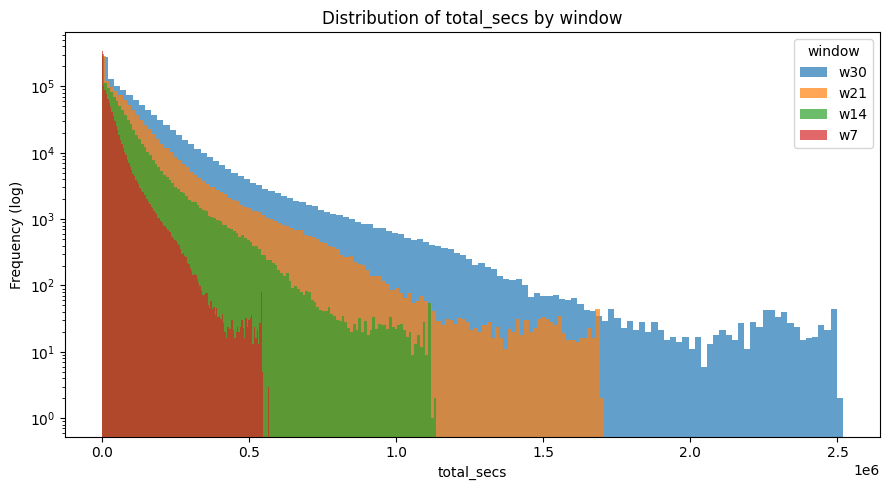

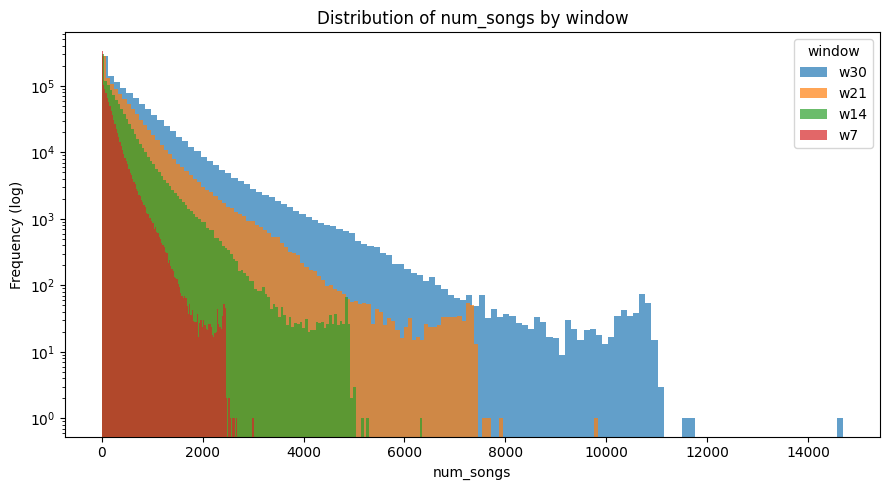

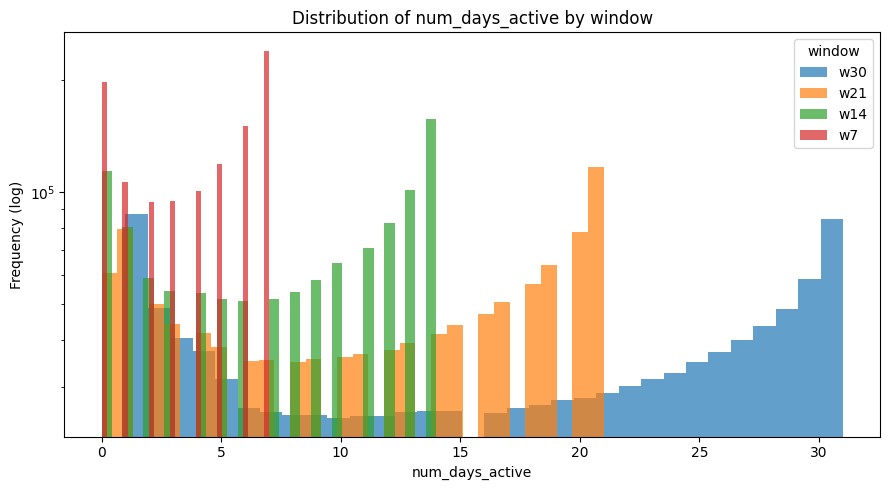

In [31]:
def plot_hist_by_window(user_logs_agg, metric, bins=120, logy=True):
    plt.figure(figsize=(9, 5))

    # 먼저 긴 윈도우를 뒤에 깔고, 짧은 윈도우를 위로 올리면 보기 편함
    # (w30이 바닥, w7이 맨 위)
    for z, w in enumerate(reversed(WINDOWS)):
        col = f"{metric}_{w}"
        if col not in user_logs_agg.columns:
            continue

        plt.hist(
            user_logs_agg[col].values,
            bins=bins,
            alpha=0.7,
            log=logy,
            zorder=z,       # 뒤에서부터 쌓기
            label=w,
        )

    plt.title(f"Distribution of {metric} by window")
    plt.xlabel(metric)
    plt.ylabel("Frequency (log)" if logy else "Frequency")
    plt.legend(title="window")
    plt.tight_layout()
    plt.show()


plot_hist_by_window(user_logs_agg, "total_secs", bins=120, logy=True)
plot_hist_by_window(user_logs_agg, "num_songs", bins=120, logy=True)
plot_hist_by_window(user_logs_agg, "num_days_active", bins=32, logy=True)

## 2-2. ratio 계열 분포 (겹침 + zorder + alpha=0.7)
- ratio는 [0, 1] 안에 있고, window 간 크게 붕괴 없으면 정상

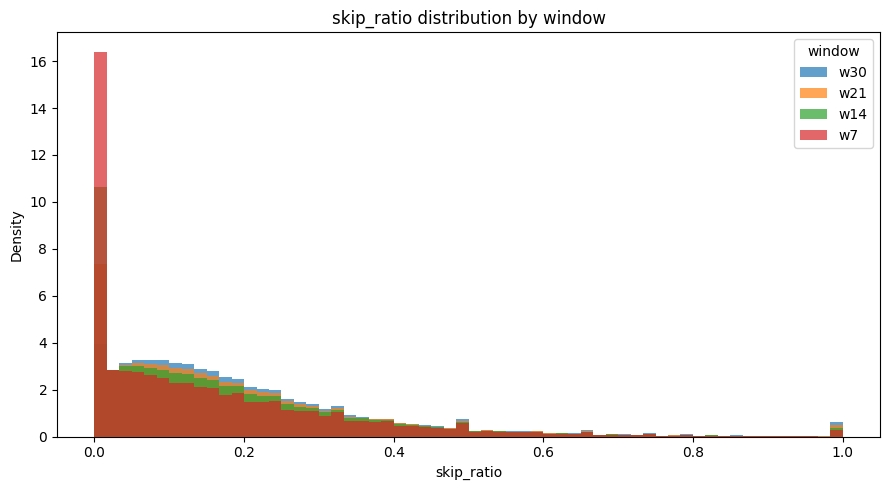

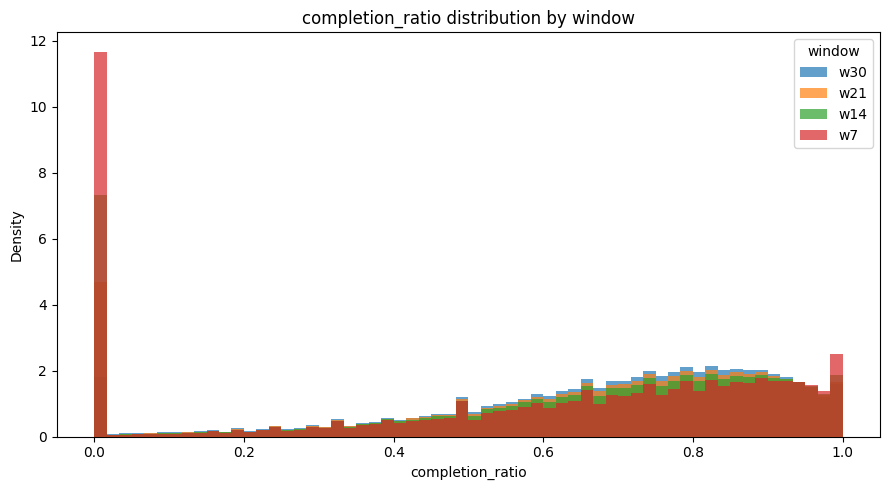

In [32]:
def plot_ratio_hist_by_window(user_logs_agg, metric, bins=60):
    plt.figure(figsize=(9, 5))

    for z, w in enumerate(reversed(WINDOWS)):
        col = f"{metric}_{w}"
        if col not in user_logs_agg.columns:
            continue

        plt.hist(
            user_logs_agg[col].values,
            bins=bins,
            alpha=0.7,
            density=True,
            zorder=z,
            label=w,
        )

    plt.title(f"{metric} distribution by window")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend(title="window")
    plt.tight_layout()
    plt.show()


plot_ratio_hist_by_window(user_logs_agg, "skip_ratio")
plot_ratio_hist_by_window(user_logs_agg, "completion_ratio")

## 2-3. window별 0 비율 (bar)
- w7의 0 비율이 높고 w30에서 줄어드는 게 자연스러움

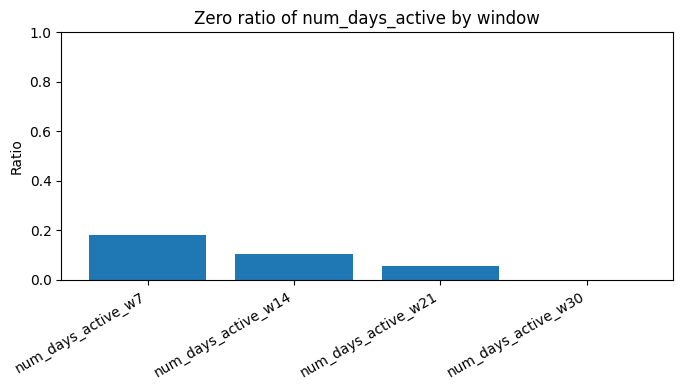

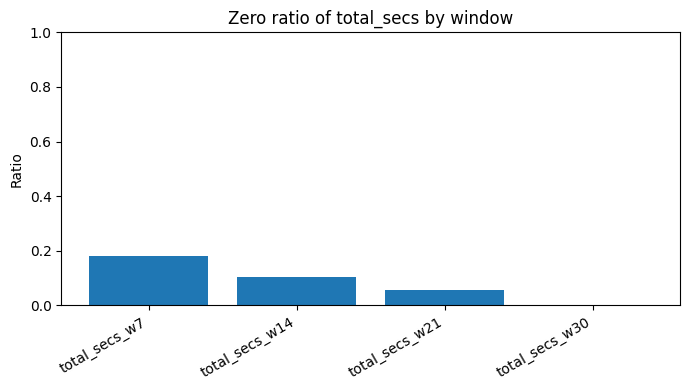

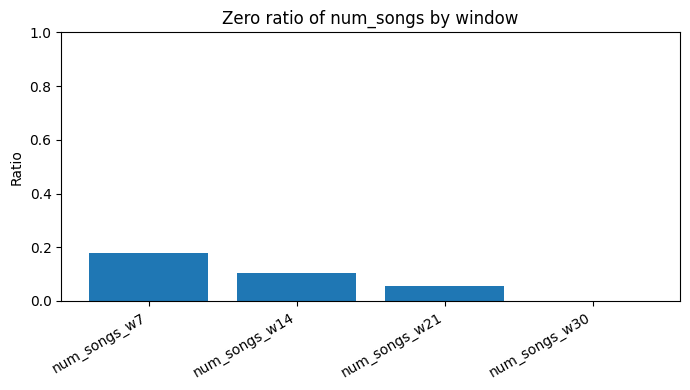

In [33]:
def plot_zero_ratio(user_logs_agg, metric):
    cols = [f"{metric}_{w}" for w in WINDOWS if f"{metric}_{w}" in user_logs_agg.columns]
    ratios = [(user_logs_agg[c] == 0).mean() for c in cols]

    plt.figure(figsize=(7, 4))
    plt.bar(cols, ratios)
    plt.title(f"Zero ratio of {metric} by window")
    plt.ylabel("Ratio")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


plot_zero_ratio(user_logs_agg, "num_days_active")
plot_zero_ratio(user_logs_agg, "total_secs")
plot_zero_ratio(user_logs_agg, "num_songs")

# 3. (label 없는 상태의) 최소 비교 = window 간 관계 시각화

## 3-1. window 간 상관 히트맵 (누적형)

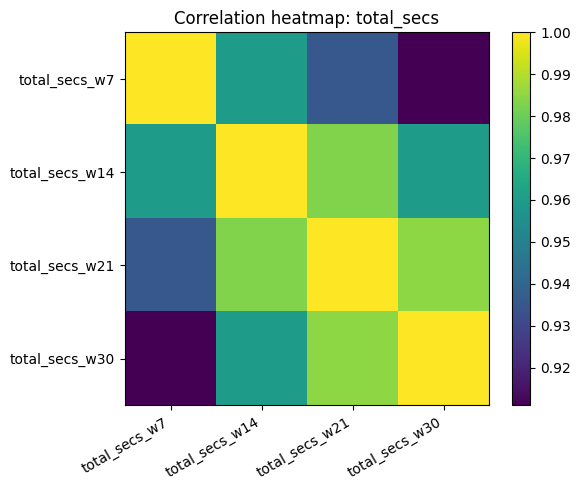

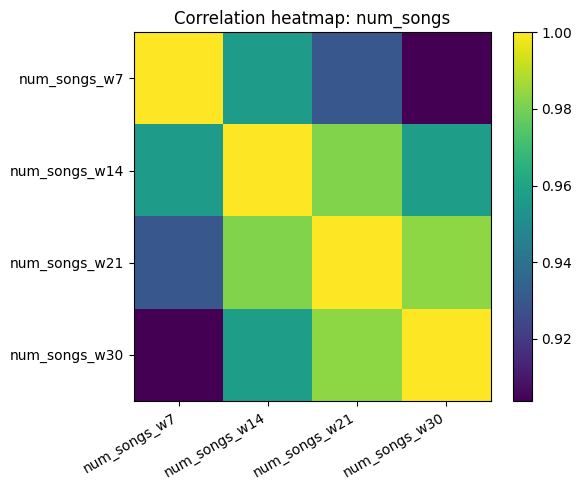

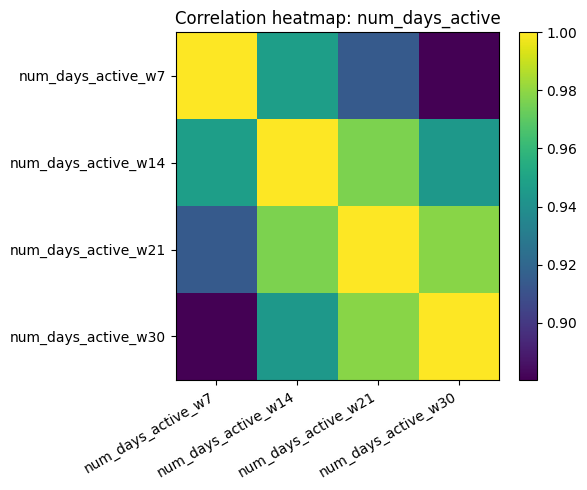

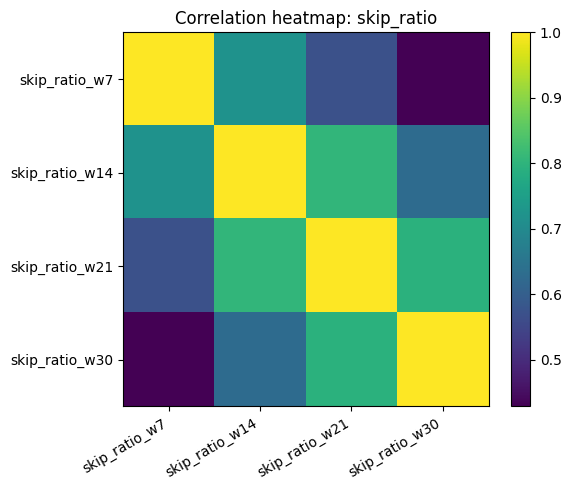

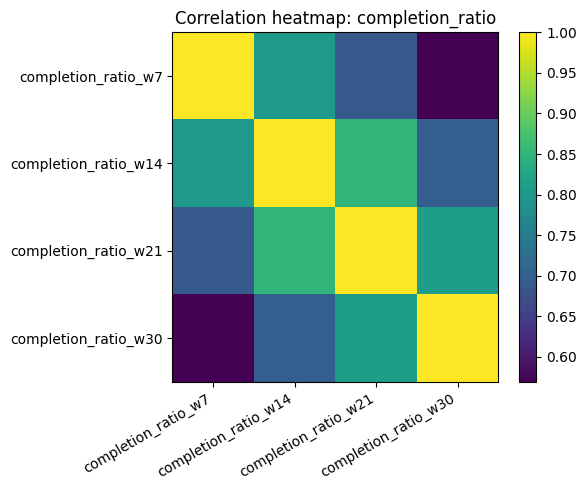

In [34]:
def plot_corr_heatmap(user_logs_agg, metric):
    cols = [f"{metric}_{w}" for w in WINDOWS if f"{metric}_{w}" in user_logs_agg.columns]
    corr = user_logs_agg[cols].corr()

    plt.figure(figsize=(6, 5))
    plt.imshow(corr, aspect="auto")
    plt.xticks(range(len(cols)), cols, rotation=30, ha="right")
    plt.yticks(range(len(cols)), cols)
    plt.colorbar()
    plt.title(f"Correlation heatmap: {metric}")
    plt.tight_layout()
    plt.show()


plot_corr_heatmap(user_logs_agg, "total_secs")
plot_corr_heatmap(user_logs_agg, "num_songs")
plot_corr_heatmap(user_logs_agg, "num_days_active")
plot_corr_heatmap(user_logs_agg, "skip_ratio")
plot_corr_heatmap(user_logs_agg, "completion_ratio")

# 4. 극단값 / 무효값 확인 (시각화 포함)

## 4-1. ratio 범위 위반 개수 (텍스트 + 간단 확인)

In [35]:
def count_invalid_ratio(user_logs_agg, prefix):
    cols = [c for c in user_logs_agg.columns if c.startswith(prefix)]
    if not cols:
        return 0, []

    invalid = ((user_logs_agg[cols] < 0) | (user_logs_agg[cols] > 1)).any(axis=1)
    return int(invalid.sum()), cols


n1, _ = count_invalid_ratio(user_logs_agg, "skip_ratio_")
n2, _ = count_invalid_ratio(user_logs_agg, "completion_ratio_")
print("Invalid skip_ratio rows:", n1)
print("Invalid completion_ratio rows:", n2)

Invalid skip_ratio rows: 0
Invalid completion_ratio rows: 0


## 4-2. total_secs boxplot (outlier 숨김 + log y)
- window별 중앙값/분산이 자연스럽게 증가하는지 확인

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_31703/2662378757.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=WINDOWS, showfliers=False)


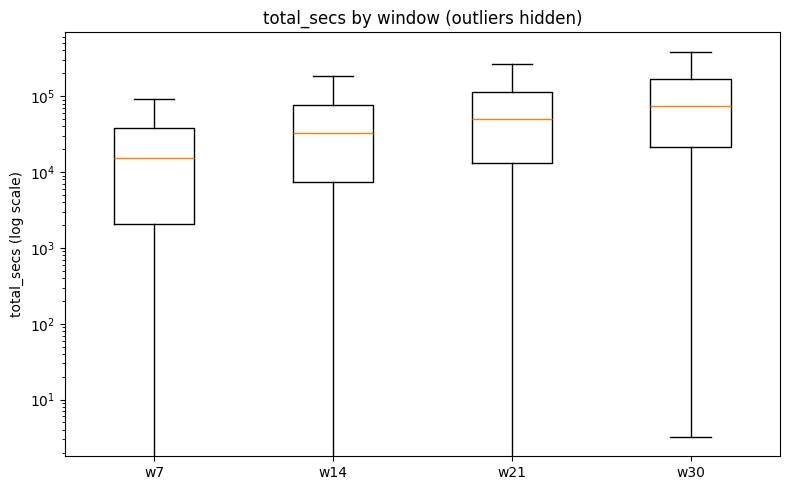

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_31703/2662378757.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=WINDOWS, showfliers=False)


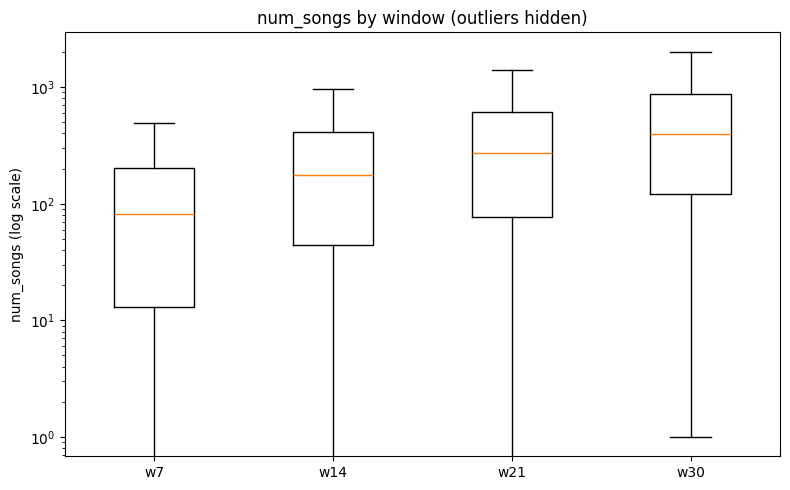

In [36]:
def plot_box_by_window(user_logs_agg, metric, logy=True):
    cols = [f"{metric}_{w}" for w in WINDOWS if f"{metric}_{w}" in user_logs_agg.columns]
    data = [user_logs_agg[c].values for c in cols]

    plt.figure(figsize=(8, 5))
    plt.boxplot(data, labels=WINDOWS, showfliers=False)
    if logy:
        plt.yscale("log")
    plt.title(f"{metric} by window (outliers hidden)")
    plt.ylabel(f"{metric}" + (" (log scale)" if logy else ""))
    plt.tight_layout()
    plt.show()


plot_box_by_window(user_logs_agg, "total_secs", logy=True)
plot_box_by_window(user_logs_agg, "num_songs", logy=True)

## 4-3. 상위 0.1% 꼬리 크기 (line)
- window별로 “꼬리 비중”이 크게 튀지 않으면 정상

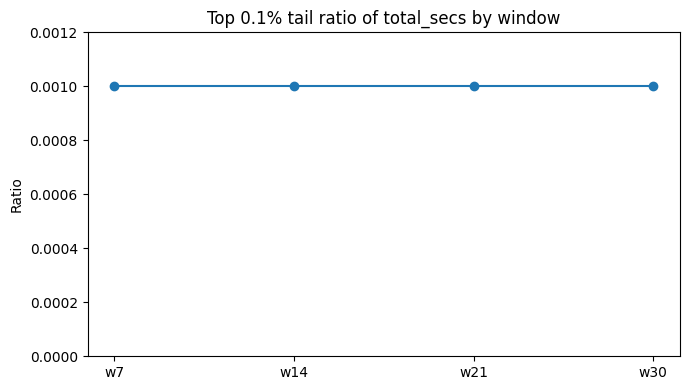

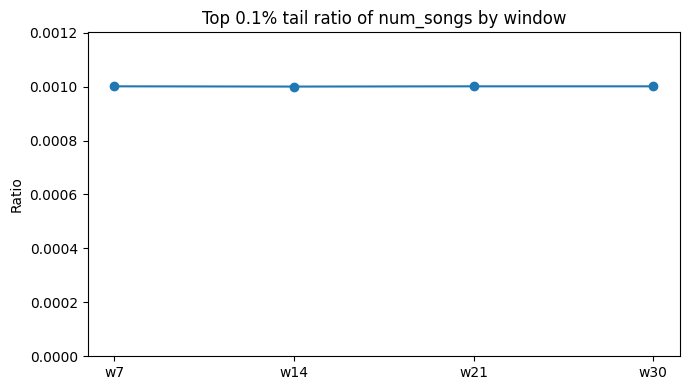

In [37]:
def plot_top_tail_ratio(user_logs_agg, metric, q=0.999):
    ratios = []
    for w in WINDOWS:
        col = f"{metric}_{w}"
        if col not in user_logs_agg.columns:
            ratios.append(np.nan)
            continue
        thr = user_logs_agg[col].quantile(q)
        ratios.append((user_logs_agg[col] >= thr).mean())

    plt.figure(figsize=(7, 4))
    plt.plot(WINDOWS, ratios, marker="o")
    plt.title(f"Top {int((1-q)*1000)/10}% tail ratio of {metric} by window")
    plt.ylabel("Ratio")
    plt.ylim(0, max([r for r in ratios if not np.isnan(r)] + [0.001]) * 1.2)
    plt.tight_layout()
    plt.show()


plot_top_tail_ratio(user_logs_agg, "total_secs", q=0.999)
plot_top_tail_ratio(user_logs_agg, "num_songs", q=0.999)